In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('cleaned_complete.csv')

In [88]:
data = data[['bathrooms','bedrooms','carspaces','postcode','year','month','rent','distance of the closest bus stop','count of bus stop','count of vline stop',
'count of school','count of shopping mall','bench','cafe','childcare','fast_food','kindergarten','parking','restaurant','place_of_worship','school','university','garden',
'park','playground','pitch','offence count','incidents recorded']]

In [ ]:
features = data[['bathrooms','bedrooms','carspaces','distance of the closest bus stop','postcode','count of bus stop','count of vline stop',
'count of school','count of shopping mall','bench','cafe','childcare','fast_food','kindergarten','parking','restaurant','place_of_worship','school','university','garden',
'park','playground','pitch','offence count','incidents recorded']]
target = data['rent']

In [ ]:

X_full, y_full = features,target
n_samples = X_full.shape[0] # 样本
n_features = X_full.shape[1] # 特征
print(n_samples)
print(n_features)
 
#首先确定我们希望放入的缺失值数据的比例，在这里我假设是50%，可以自己改动
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features *missing_rate))
#np.floor  向下取整
#所有数据要随机遍布在数据集的各行各列当中，而一个确实的数据会需要一盒行索引和一个列索引
#如果能够创造一个数组，就可以利用索引来赋空值
 
X_missing_reg = X_full.copy()
# 查看缺失情况
missing = X_missing_reg .isna().sum()
missing = pd.DataFrame(data={'特征': missing.index,'缺失值个数':missing.values})
#通过~取反，选取不包含数字0的行
missing = missing[~missing['缺失值个数'].isin([0])]
# 缺失比例
missing['缺失比例'] =  missing['缺失值个数']/X_missing_reg .shape[0]
X_df = X_missing_reg.isnull().sum()
# 得出列名 缺失值最少的列名 到 缺失值最多的列名
colname = X_df[~X_df.isin([0])].sort_values().index.values
# 缺失值从小到大的特征顺序
sortindex = []
for i in colname:
    sortindex.append(X_missing_reg.columns.tolist().index(str(i)))
# 遍历所有的特征，从缺失最少的开始进行填补，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填补下一个特征
for i in sortindex:
    # 构建我们的新特征矩阵和新标签
    df = X_missing_reg  # 充当中间数据集
    fillc = df.iloc[:, i]  # 缺失值最少的特征列
    # 除了第 i 特征列，剩下的特征列+原有的完整标签 = 新的特征矩阵
    df = pd.concat([df.drop(df.columns[i], axis=1), pd.DataFrame(y_full)], axis=1)
    # 在新特征矩阵中，对含有缺失值的列，进行0的填补 ，没循环一次，用0填充的列越来越少
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    # 找出训练集和测试集
    # 标签
    Ytrain = fillc[fillc.notnull()]  # 没有缺失的部分，就是 Y_train
    Ytest = fillc[fillc.isnull()]  # 不是需要Ytest的值，而是Ytest的索引
    # 特征矩阵
    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :]  # 有缺失值的特征情况
    rfc = RandomForestRegressor(n_estimators=100)  # 实例化
    rfc = rfc.fit(Xtrain, Ytrain)  # 训练
    Ypredict = rfc.predict(Xtest)  # 预测结果，就是要填补缺失值的值
    # 将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), X_missing_reg.columns[i]] = Ypredict




100639
25


In [2]:
new_data = X_missing_reg

NameError: name 'X_missing_reg' is not defined

In [ ]:
new_data.to_csv('rfr.csv')

In [3]:
new_data = pd.read_csv('rfr.csv')

In [5]:
new_data['year'] = data['year'] 
new_data['month'] = data['month'] 

In [6]:
new_data.drop(['Unnamed: 0'],axis=1)

,bathrooms,bedrooms,carspaces,distance of the closest bus stop,postcode,count of bus stop,count of vline stop,count of school,count of shopping mall,bench,...,university,garden,park,playground,pitch,offence count,incidents recorded,rent,year,month
0,1.0,1.0,0.0,0.436505,3205,10,0,3.0,0,11.00,...,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,360.0,2019,1
1,2.0,2.0,1.0,0.432419,3205,10,0,3.0,0,11.00,...,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,725.0,2019,1
2,1.0,2.0,0.0,0.434637,3205,10,0,3.0,0,11.00,...,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,500.0,2019,1
3,1.0,3.0,0.0,0.443168,3205,10,0,3.0,0,11.00,...,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,795.0,2019,1
4,2.0,2.0,0.0,0.446094,3205,10,0,3.0,0,11.00,...,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,825.0,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,1.0,3.0,1.0,2.030447,3701,1,0,2.0,0,0.00,...,0.0,0.00,0.69,0.03,0.65,302.0,230.0,280.0,2022,5
100635,1.0,3.0,1.0,2.030108,3701,1,0,2.0,0,0.00,...,0.0,0.00,0.69,0.03,0.65,302.0,230.0,290.0,2022,6
100636,1.0,3.0,2.0,1.502645,3700,1,0,3.0,0,0.02,...,0.0,0.09,0.35,0.00,1.09,605.0,484.0,470.0,2022,8
100637,1.0,3.0,2.0,1.494697,3700,1,0,3.0,0,0.02,...,0.0,0.09,0.35,0.00,1.04,605.0,484.0,310.0,2021,3


In [7]:
X = new_data.drop(['rent','postcode','Unnamed: 0'],axis=1)

y = data['rent']

In [8]:
X

,bathrooms,bedrooms,carspaces,distance of the closest bus stop,count of bus stop,count of vline stop,count of school,count of shopping mall,bench,cafe,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,year,month
0,1.0,1.0,0.0,0.436505,10,0,3.0,0,11.00,41.00,...,1.00,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1
1,2.0,2.0,1.0,0.432419,10,0,3.0,0,11.00,41.00,...,1.00,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1
2,1.0,2.0,0.0,0.434637,10,0,3.0,0,11.00,41.00,...,1.00,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1
3,1.0,3.0,0.0,0.443168,10,0,3.0,0,11.00,41.00,...,1.00,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1
4,2.0,2.0,0.0,0.446094,10,0,3.0,0,11.00,41.00,...,1.00,0.0,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,1.0,3.0,1.0,2.030447,1,0,2.0,0,0.00,0.21,...,0.38,0.0,0.00,0.69,0.03,0.65,302.0,230.0,2022,5
100635,1.0,3.0,1.0,2.030108,1,0,2.0,0,0.00,0.21,...,0.34,0.0,0.00,0.69,0.03,0.65,302.0,230.0,2022,6
100636,1.0,3.0,2.0,1.502645,1,0,3.0,0,0.02,0.09,...,0.99,0.0,0.09,0.35,0.00,1.09,605.0,484.0,2022,8
100637,1.0,3.0,2.0,1.494697,1,0,3.0,0,0.02,0.09,...,0.99,0.0,0.09,0.35,0.00,1.04,605.0,484.0,2021,3


In [9]:
X_length = X.shape[0]
split = int(X_length * 0.8)
X_train,X_test = X[:split].astype('int'),X[split:].astype('int')
y_train,y_test = y[:split].astype('int'),y[split:].astype('int')

In [10]:
model1 = RandomForestRegressor(n_estimators=100)
model1.fit(X_train,y_train)


RandomForestRegressor()

In [11]:
model1.feature_importances_

array([0.1861329 , 0.1138902 , 0.04551122, 0.00034462, 0.17144835,
       0.00466912, 0.01927299, 0.00520804, 0.01216399, 0.05462106,
       0.00293527, 0.00864141, 0.00363058, 0.01577675, 0.01702377,
       0.00633752, 0.01661245, 0.01633728, 0.01046383, 0.03288509,
       0.00982267, 0.01363856, 0.02424096, 0.0374283 , 0.07587313,
       0.09508993])

0.00034461619901882216 distance of the closest bus stop
0.002935270217434603 childcare
0.003630582556721349 kindergarten
0.004669124039292819 count of vline stop
0.005208038854798059 count of shopping mall
0.006337516428992373 place_of_worship
0.008641410044851862 fast_food
0.009822670592818638 playground
0.010463834341071515 garden
0.012163990588026957 bench
0.013638561972289426 pitch
0.015776746909861843 parking
0.016337277902554004 university
0.01661245145717376 school
0.017023768411757175 restaurant
0.019272989703860717 count of school
0.024240960969601266 offence count
0.03288509040021842 park
0.03742830341344838 incidents recorded
0.045511222898492354 carspaces
0.05462106473178805 cafe
0.07587312565698999 year
0.09508993097698325 month
0.11389020055438984 bedrooms
0.171448353605646 count of bus stop
0.18613289657191845 bathrooms


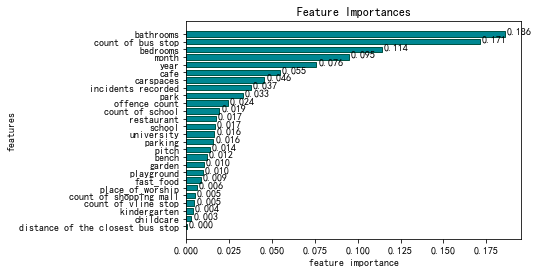

In [12]:
features_import = DataFrame(new_data.drop(['postcode','rent','Unnamed: 0'],axis=1).columns, columns=['feature'])
features_import['importance'] = model1.feature_importances_  
features_import.sort_values('importance', inplace=True)

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  

plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344') 
plt.xlabel('feature importance')
plt.ylabel('features') 
plt.title('Feature Importances') 
for a,b in zip( features_import['importance'],features_import['feature']): 
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a)) 
plt.show()

In [13]:
train_data = new_data.drop(['postcode','rent','Unnamed: 0'],axis=1)

In [14]:
pred1 = model1.predict(train_data)

In [15]:
train_data['pred'] = pred1

In [16]:
train_data['year'] = data['year'] 

In [17]:
train_data['month'] = data['month'] 

In [18]:
train_data['postcode'] = data['postcode']

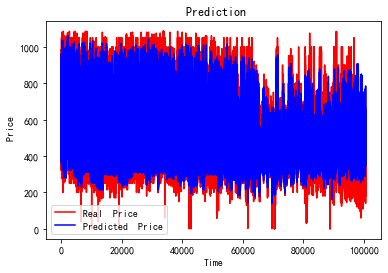

In [19]:
plt.plot(data['rent'], color = 'red', label = 'Real  Price')
plt.plot(train_data['pred'], color = 'blue', label = 'Predicted  Price')
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel(' Price')
plt.legend()
plt.show()

In [20]:
train_data

,bathrooms,bedrooms,carspaces,distance of the closest bus stop,count of bus stop,count of vline stop,count of school,count of shopping mall,bench,cafe,...,garden,park,playground,pitch,offence count,incidents recorded,year,month,pred,postcode
0,1.0,1.0,0.0,0.436505,10,0,3.0,0,11.00,41.00,...,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1,372.530582,3205
1,2.0,2.0,1.0,0.432419,10,0,3.0,0,11.00,41.00,...,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1,611.611244,3205
2,1.0,2.0,0.0,0.434637,10,0,3.0,0,11.00,41.00,...,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1,630.984008,3205
3,1.0,3.0,0.0,0.443168,10,0,3.0,0,11.00,41.00,...,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1,815.925833,3205
4,2.0,2.0,0.0,0.446094,10,0,3.0,0,11.00,41.00,...,8.00,16.00,10.00,5.00,22895.0,17201.0,2019,1,826.772798,3205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,1.0,3.0,1.0,2.030447,1,0,2.0,0,0.00,0.21,...,0.00,0.69,0.03,0.65,302.0,230.0,2022,5,619.220000,3701
100635,1.0,3.0,1.0,2.030108,1,0,2.0,0,0.00,0.21,...,0.00,0.69,0.03,0.65,302.0,230.0,2022,6,620.030000,3701
100636,1.0,3.0,2.0,1.502645,1,0,3.0,0,0.02,0.09,...,0.09,0.35,0.00,1.09,605.0,484.0,2022,8,618.255000,3700
100637,1.0,3.0,2.0,1.494697,1,0,3.0,0,0.02,0.09,...,0.09,0.35,0.00,1.04,605.0,484.0,2021,3,422.265000,3700


In [177]:
new = []

In [178]:
for name,group in train_data.groupby(['year','month']):
    rent = group['pred'].median()
    bathroom = group['bathrooms'].median()
    bedroom = group['bedrooms'].median()
    carspaces = group['carspaces'].median()
    distance_bus = group['distance of the closest bus stop'].median()
    count_bus = group['count of bus stop'].mean()
    count_vline = group['count of vline stop'].mean()
    count_school = group['count of school'].mean()
    count_shopping = group['count of shopping mall'].mean()
    count_bench = group['bench'].mean()
    count_cafe = group['cafe'].mean()
    count_childcare = group['childcare'].mean()
    count_fastfood = group['fast_food'].mean()
    count_kindergarten = group['kindergarten'].mean()
    count_parking = group['parking'].mean()
    count_restaurant = group['restaurant'].mean()
    count_university = group['university'].mean()
    count_garden = group['garden'].mean()
    count_park = group['place_of_worship'].mean()
    count_incident = group['incidents recorded'].mean()
    count_park = group['park'].mean()
    count_pitch = group['pitch'].mean()
    count_offence = group['offence count'].mean()
    new.append((name[0],name[1],rent,bathroom,bedroom,carspaces,count_bus,distance_bus,count_vline,count_school,count_shopping,count_bench,count_cafe,count_childcare,count_fastfood,count_kindergarten
    ,count_parking,count_restaurant,count_university,count_garden,count_park,count_pitch,count_offence))




    





In [179]:
df = pd.DataFrame(new,columns=['year','month','rent','bathroom','bedroom','carspaces','count_bus','distance_bus','count_vline','count_school','count_shopping','count_bench','count_cafe','count_childcare','count_fastfood','count_kindergarten'
    ,'count_parking','count_restaurant','count_university','count_garden','count_park','count_pitch','count_offence'])

In [180]:
df.to_csv('pred_me.csv')

In [226]:
df = df.drop(['year','month'],axis=1)

KeyError: "['year' 'month'] not found in axis"

In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


In [228]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

In [230]:
df_test = scaled[:round(len(df)*0.8)]
df_train = scaled[round(len(df)*0.8):]

In [231]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import layers
from keras.optimizers import Adam

In [232]:
train_x = []
train_y = []
test_x = []
test_y = []

for i in range(8, len(df_test)):
    test_x.append(df_test[i - 8:i, 1:df_test.shape[1]])
    test_y.append(df_test[i,0])

for i in range(8, len(df_train)):
    train_x.append(df_train[i - 8:i, 1:df_train.shape[1]])
    train_y.append(df_train[i,0])
test_x = np.array(test_x)
test_y = np.array(test_y)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [233]:
model = Sequential()
model.add(LSTM(50,input_shape = (8,20)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.fit(train_x,train_y,epochs = 100,batch_size = 20,verbose = 2)

Epoch 1/100
1/1 - 1s - loss: 1.1274 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.8817 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6683 - 3ms/epoch - 3ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4865 - 3ms/epoch - 3ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3354 - 4ms/epoch - 4ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2139 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1210 - 4ms/epoch - 4ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0556 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0162 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 6.0877e-04 - 3ms/epoch - 3ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0048 - 3ms/epoch - 3ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0226 - 3ms/epoch - 3ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0457 - 3ms/epoch - 3ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0660 - 3ms/epoch - 3ms/step
Epoch 15/100
1/1 - 0s - loss: 0.0786 - 3ms/epoch - 3ms/step
Epoch 16/100
1/1 - 0s - loss: 0.0822 - 3ms/epoch - 3ms/step
Epoch 17/100
1/1 - 0s - loss: 0.0780 - 3ms/epoc

In [234]:
prediction=model.predict(test_x)

1/1 [==============================] - 0s 256ms/step


In [235]:
prediction_copies_array = np.repeat(prediction,21, axis=-1)

In [261]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),21)))[:,0]

In [262]:
original_copies_array = np.repeat(test_y,21, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(test_y),21)))[:,0]

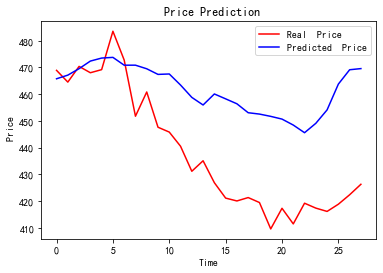

In [263]:
plt.plot(original, color = 'red', label = 'Real  Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Price')
plt.title(' Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Price')
plt.legend()
plt.show()

In [244]:
df= pd.read_csv('pred_me.csv')

In [245]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
def arima(data):
    model = ARIMA(data, order=(0, 0, 1))
    model_fit = model.fit()
    yhat = model_fit.predict(len(data), len(data))
    return yhat

In [246]:
df = df.drop('Unnamed: 0',axis=1)

In [247]:
df

,year,month,rent,bathroom,bedroom,carspaces,count_bus,distance_bus,count_vline,count_school,...,count_childcare,count_fastfood,count_kindergarten,count_parking,count_restaurant,count_university,count_garden,count_park,count_pitch,count_offence
0,2019,1,475.991299,1.0,2.0,1.0,65.462234,0.464352,0.638474,7.085578,...,0.991739,11.162470,2.775767,92.656176,18.793863,0.477970,18.526357,48.436271,56.752164,37798.084579
1,2019,2,476.558333,1.0,2.0,1.0,58.663705,0.456270,0.597512,6.568583,...,0.904931,10.672590,2.630386,87.641937,18.616615,0.464238,18.088849,46.012883,49.667259,40511.902710
2,2019,3,472.530655,1.0,2.0,1.0,65.097611,0.462601,0.574987,7.041713,...,0.954753,10.948653,2.700051,92.486019,18.169293,0.530757,21.313676,51.047789,55.685308,33852.103203
3,2019,4,472.200000,1.0,3.0,1.0,70.299813,0.466155,0.589631,7.772954,...,0.994379,11.429731,2.843223,99.396627,18.108057,0.515928,27.120550,57.053092,62.092442,33717.675828
4,2019,5,463.573333,1.0,3.0,1.0,68.430238,0.472212,0.611293,7.478460,...,1.022403,11.614578,2.871675,98.894937,18.776948,0.521232,21.259491,53.939034,61.883826,31513.413906
5,2019,6,466.717073,1.0,2.0,1.0,66.944218,0.468413,0.601395,7.430244,...,0.972109,11.266124,2.772225,92.297501,19.154561,0.485183,21.893085,50.525857,58.588030,31905.339919
6,2019,7,461.400000,1.0,3.0,1.0,70.506809,0.466031,0.579574,7.554374,...,0.999583,11.458319,2.805106,99.158591,17.278723,0.473617,26.175745,57.690940,62.537830,34336.857021
7,2019,8,461.363581,1.0,3.0,1.0,66.213478,0.469014,0.569878,7.265635,...,0.922207,11.041610,2.710991,93.123926,17.163275,0.521483,20.849389,51.782904,62.008141,32160.522840
8,2019,9,468.918324,1.0,2.0,1.0,64.796389,0.466530,0.612839,7.290261,...,0.944333,11.364594,2.809428,97.752257,18.322467,0.557172,22.450853,53.752758,67.551655,33300.719659
9,2019,10,464.522543,1.0,2.0,1.0,67.929373,0.462809,0.636109,7.595851,...,0.977081,11.162769,2.772217,98.695510,18.317119,0.503274,25.547708,54.710477,63.871843,34851.499532


In [248]:
future = []
for group in df:
    data = df[group]
    for i in range(1,36):
        data = data.append(arima(data))
    future.append(data)


c:\Users\AlexX\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\AlexX\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\AlexX\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\AlexX\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

In [250]:
df2 = pd.DataFrame({'rent':future[2],'bathroom':round(future[3]),'bedroom':round(future[4]),'carspaces':round(future[5]),'count_bus':future[6],'distance_bus':future[7],'count_vline':future[8],'count_school':future[9],
'count_shopping':future[10],'count_bench':future[11],'count_cafe':future[12],'count_childcare':future[13],'count_fastfood':future[14],'count_kindergarten':future[15]
    ,'count_parking':future[16],'count_restaurant':future[17],'count_university':future[18],'count_garden':future[19],'count_park':future[20],'count_pitch':future[21],'count_offence':future[22]})

In [251]:
future = df2[37:]

In [252]:
sc = scaler.transform(future)

In [271]:
future_x = []
for i in range(8, len(sc)):
    future_x.append(sc[i - 8:i, 1:df_test.shape[1]])
future_x = np.array(future_x)

In [272]:
prediction_future=model.predict(future_x)

2/2 [==============================] - 0s 2ms/step


In [273]:
prediction_copies_future = np.repeat(prediction_future,21, axis=-1)

In [275]:
pred1=scaler.inverse_transform(np.reshape(prediction_copies_future,(len(prediction_future),21)))[:,0]

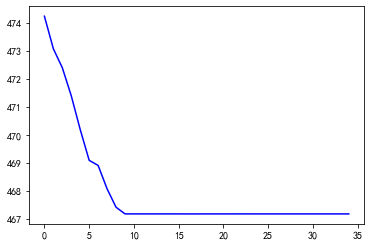

In [276]:
plt.plot(pred1, color = 'blue', label = 'Predicted  Price')